# Decision Tree Classification


## Importing the necessary libraries and packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from joblib import dump
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    DetCurveDisplay,
    PrecisionRecallDisplay,
    RocCurveDisplay,
    accuracy_score,
    classification_report,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

## Importing the csv file as a DataFrame


In [2]:
df = pd.read_csv("../../../../Datasets/SocialNetworkAds.csv")
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


## Exploratory Data Analysis


Formal information about the dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


Description of the dataset


In [4]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,1.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,1.000000,18.000000,15000.000000,0.000000
25%,1.000000,29.750000,43000.000000,0.000000
50%,2.000000,37.000000,70000.000000,0.000000
75%,2.000000,46.000000,88000.000000,1.000000
max,2.000000,60.000000,150000.000000,1.000000


Checking if any null value exists


In [5]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Columns of the dataset


In [6]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Correlations between the variables


In [7]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


## Now taking 2 parts from the dataset

### X: which contains all columns except the <b>target</b> column<br>Y: which contains only the <b>target</b> column


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Split the <b>X</b> and <b>y</b> Dataframes for Test and Training


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Implementation of the Model


In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

In [11]:
r = export_text(dtc, feature_names=df.columns[:-1].tolist())
print(r)

|--- Age <= 42.50
|   |--- EstimatedSalary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- EstimatedSalary <= 83500.00
|   |   |   |   |--- EstimatedSalary <= 67500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- EstimatedSalary >  67500.00
|   |   |   |   |   |--- EstimatedSalary <= 70500.00
|   |   |   |   |   |   |--- Age <= 39.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  39.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- EstimatedSalary >  70500.00
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |   |   |   |--- EstimatedSalary <= 78500.00
|   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 76500.00
|   |   |   |   |   |   |   |   |   |   |--- Age <= 38.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Age >  38.50
|   |   |   |   |   

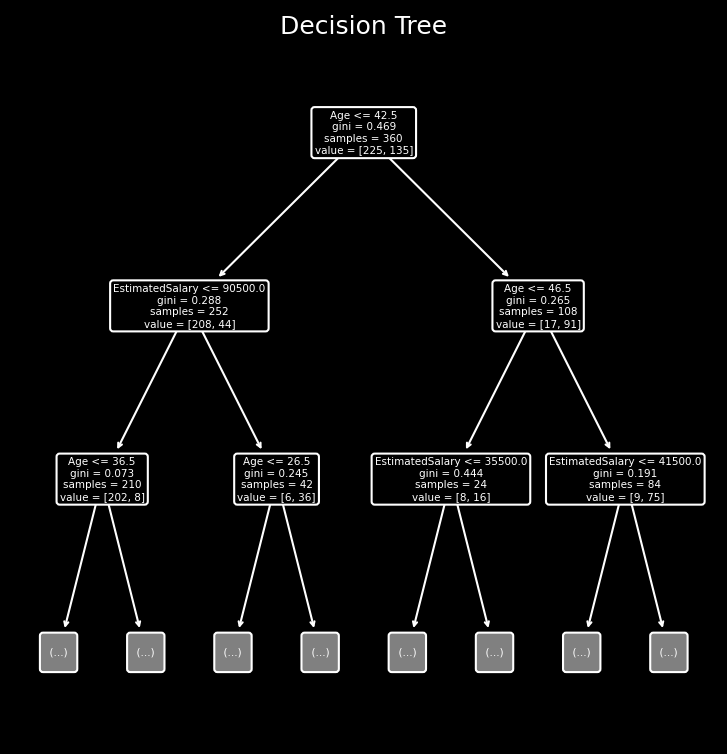

In [12]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
plot_tree(
    dtc,
    ax=ax,
    max_depth=2,
    feature_names=df.columns[:-1].tolist(),
    rounded=True,
    fontsize=5,
)
plt.title("Decision Tree")
plt.savefig("Images/Decision_Tree.png", bbox_inches="tight")

In [ ]:
y_pred = dtc.predict(X_test)

## Performance of the Model


In [13]:
dtc_acc = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classification :", dtc_acc * 100, "%\n")  # type: ignore
print("Classification Report", "\n", classification_report(y_test, y_pred))

Confusion Matrix 
 [[31  1]
 [ 2  6]] 

Accuracy of Decision Tree Classification : 92.5 

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        32
           1       0.86      0.75      0.80         8

    accuracy                           0.93        40
   macro avg       0.90      0.86      0.88        40
weighted avg       0.92      0.93      0.92        40



## Plotting the Confusion Matrix


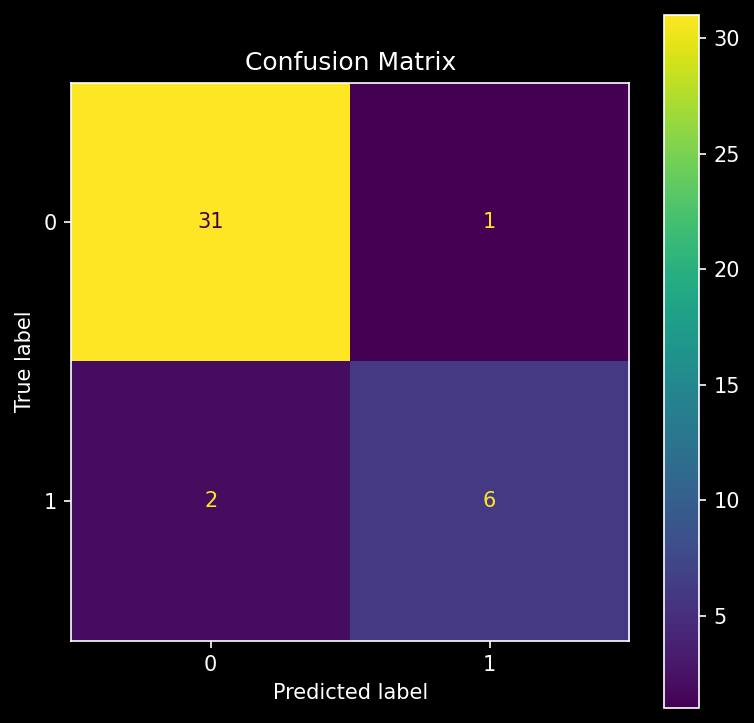

In [14]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, ax=ax)
plt.title("Confusion Matrix")
plt.savefig(
    "Images/Confusion_Matrix_Decision_Tree_Classification.png", bbox_inches="tight"
)

## Plotting the ROC curve


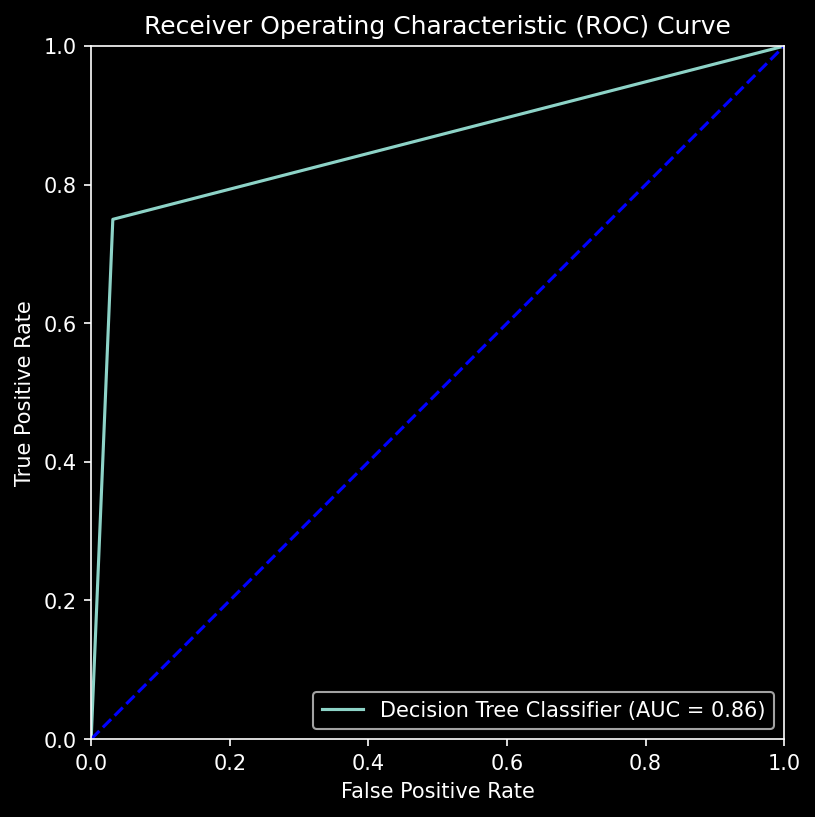

In [16]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
RocCurveDisplay.from_estimator(dtc, X_test, y_test, ax=ax)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.savefig("Images/ROC_Curve_Decision_Tree_Classification.png", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
PrecisionRecallDisplay.from_estimator(dtc, X_test, y_test, ax=ax)
plt.title("Precision Recall Curve")
plt.savefig(
    "Images/Precision_Recall_Curve_Decision_Tree_Classification.png",
    bbox_inches="tight",
)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
DetCurveDisplay.from_estimator(dtc, X_test, y_test, ax=ax)
plt.title("Detection Error Tradeoff (DET) Curve")
plt.savefig("Images/DET_Curve_Decision_Tree_Classification.png", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
CalibrationDisplay.from_estimator(dtc, X_test, y_test, ax=ax, ref_line=False)
plt.title("Calibration Curve")
plt.savefig(
    "Images/Calibration_Curve_Decision_Tree_Classification.png", bbox_inches="tight"
)

## Saving the model


In [18]:
dump(dtc, "../../../../Models/decisionTreeClassifier.joblib")

['../../../../Models/decisionTreeClassifier.joblib']